# <font color='blue'>PDDA machine learning competition 2021 </font> 

### Team: Iron486  

### Import the libraries

In [2]:
import pandas as pd
from sklearn.linear_model import BayesianRidge
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from numpy import isnan
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import ExtraTreesRegressor, AdaBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import Birch
from numpy import unique
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers

### Read the data

In [51]:
df1=pd.read_csv('train.csv')


In [52]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

df1.describe()

,WELLNUM,DEPTH,DTC,DTS,BS,CALI,DEN,DENC,GR,NEU,PEF,RDEP,RMED,ROP,PHIF,SW,VSH
count,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00
mean,4.08,6998.18,-7791.05,-8605.14,-958.27,-6982.04,-7000.76,-7205.37,-43.03,-7007.12,-7221.97,-949.84,-804.02,-989.37,-8515.78,-8515.69,-8585.16
std,2.46,3797.94,4168.06,3491.48,2969.16,4592.48,4582.29,4486.57,990.10,4578.76,4480.14,2944.07,4177.16,3028.43,3554.02,3554.22,3484.04
min,0.00,335.16,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00
25%,2.00,3757.87,-9999.00,-9999.00,8.50,-9999.00,-9999.00,-9999.00,23.33,-9999.00,-9999.00,0.65,0.67,15.20,-9999.00,-9999.00,-9999.00
50%,4.00,6905.18,-9999.00,-9999.00,17.50,-9999.00,-9999.00,-9999.00,55.51,-9999.00,-9999.00,1.10,1.15,24.97,-9999.00,-9999.00,-9999.00
75%,6.00,10052.49,-9999.00,-9999.00,26.00,8.56,2.25,0.03,78.98,0.09,0.06,2.02,2.15,30.63,-9999.00,-9999.00,-9999.00
max,8.00,15651.58,181.81,388.84,36.00,20.33,3.09,0.33,1124.44,1.46,13.84,80266.80,97543.40,208.63,0.40,1.00,3.65


In [53]:
df1.head()

,WELLNUM,DEPTH,DTC,DTS,BS,CALI,DEN,DENC,GR,NEU,PEF,RDEP,RMED,ROP,PHIF,SW,VSH
0,0,335.16,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,5.33,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00
1,0,335.66,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,5.82,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00
2,0,336.16,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,6.52,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00
3,0,336.66,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,7.23,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00
4,0,337.16,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,9.50,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00


### Handling missing values

In [54]:
df1.replace(['-9999', -9999], np.nan, inplace=True)
df1

,WELLNUM,DEPTH,DTC,DTS,BS,CALI,DEN,DENC,GR,NEU,PEF,RDEP,RMED,ROP,PHIF,SW,VSH
0,0,335.16,NaN,NaN,NaN,NaN,NaN,NaN,5.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,335.66,NaN,NaN,NaN,NaN,NaN,NaN,5.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,336.16,NaN,NaN,NaN,NaN,NaN,NaN,6.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,336.66,NaN,NaN,NaN,NaN,NaN,NaN,7.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,337.16,NaN,NaN,NaN,NaN,NaN,NaN,9.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318962,8,12142.50,64.58,NaN,8.50,8.55,2.61,0.03,32.92,0.11,5.21,4.08,3.65,10.43,0.03,1.00,0.27
318963,8,12143.00,66.21,NaN,8.50,8.52,2.61,0.02,28.77,0.10,5.23,4.12,3.94,9.47,0.03,1.00,0.23
318964,8,12143.50,67.43,NaN,8.50,8.52,2.62,0.03,25.70,0.10,5.34,4.66,4.25,8.96,0.02,1.00,0.21
318965,8,12144.00,66.56,NaN,8.50,8.52,2.62,0.03,22.94,0.09,5.35,4.81,4.37,8.81,0.02,1.00,0.18


In [55]:
col_names =list(df1.columns.values[-3:])
df1.dropna(axis=0, subset=col_names, inplace=True)
df1

,WELLNUM,DEPTH,DTC,DTS,BS,CALI,DEN,DENC,GR,NEU,PEF,RDEP,RMED,ROP,PHIF,SW,VSH
27573,0,14121.66,89.65,NaN,NaN,9.90,2.58,NaN,88.86,0.28,NaN,2.63,2.49,NaN,0.00,1.00,0.75
27574,0,14122.16,96.02,NaN,NaN,9.99,2.47,NaN,120.89,0.29,NaN,2.48,2.47,NaN,0.00,1.00,1.03
27575,0,14122.66,104.05,NaN,NaN,9.90,2.33,NaN,153.52,0.45,NaN,2.44,2.37,NaN,0.00,1.00,1.31
27576,0,14123.16,113.50,NaN,NaN,9.90,2.24,NaN,182.85,0.58,NaN,2.41,2.41,NaN,0.00,1.00,1.68
27577,0,14123.66,117.78,NaN,NaN,9.81,2.23,NaN,256.20,0.56,NaN,2.34,2.41,NaN,0.00,1.00,1.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318962,8,12142.50,64.58,NaN,8.50,8.55,2.61,0.03,32.92,0.11,5.21,4.08,3.65,10.43,0.03,1.00,0.27
318963,8,12143.00,66.21,NaN,8.50,8.52,2.61,0.02,28.77,0.10,5.23,4.12,3.94,9.47,0.03,1.00,0.23
318964,8,12143.50,67.43,NaN,8.50,8.52,2.62,0.03,25.70,0.10,5.34,4.66,4.25,8.96,0.02,1.00,0.21
318965,8,12144.00,66.56,NaN,8.50,8.52,2.62,0.03,22.94,0.09,5.35,4.81,4.37,8.81,0.02,1.00,0.18


In [8]:
corr_matr=df1[1:].corr()
#corr_matr['PHIF'].sort_values(ascending=False)
corr_matr['SW'].sort_values(ascending=False)

SW         1.00
DEN        0.74
GR         0.39
VSH        0.38
CALI       0.15
PEF        0.15
DENC       0.06
NEU       -0.01
RDEP      -0.08
WELLNUM   -0.11
DTS       -0.12
RMED      -0.17
DEPTH     -0.20
ROP       -0.34
DTC       -0.37
PHIF      -0.72
BS          NaN
Name: SW, dtype: float64

In [9]:
df1.isna().sum()

WELLNUM        0
DEPTH          0
DTC        22995
DTS        35111
BS          1880
CALI           0
DEN            0
DENC        1880
GR             0
NEU            3
PEF         1880
RDEP         234
RMED           0
ROP         1977
PHIF           0
SW             0
VSH            0
dtype: int64

## Iterative imputer

In [9]:

col=['DEPTH', 'DTC', 'DTS', 'CALI', 'DEN', 'DENC', 'GR', 'NEU', 'PEF',
        'RDEP', 'RMED','PHIF','SW','VSH']

strategies = ['ascending']#, 'descending', 'roman', 'arabic', 'random']
for s in strategies:
    imputer=IterativeImputer(estimator=BayesianRidge(),imputation_order=s)
df1=df1.loc[:,col]
imputer.fit(df1)
# transform the dataset
df1 = pd.DataFrame(imputer.transform(df1),columns=df1.columns,index=df1.index)

In [11]:
df1.to_csv('dataset_with_iterativeimputer_bay.csv')


In [3]:
df1=pd.read_csv('dataset_with_iterativeimputer_bay.csv') #on 11 features
#df1=df1.reset_index(drop=True)
#df1=df1.reset_index(drop=True)
df1=df1.drop(columns='Unnamed: 0')
df1

,DEPTH,DTC,DTS,CALI,DEN,DENC,GR,NEU,PEF,RDEP,RMED,PHIF,SW,VSH
0,14121.660105,89.64610,187.877783,9.904800,2.577700,0.165995,88.85730,0.277790,6.100596,2.631000,2.492700,0.000000,1.0,0.751631
1,14122.160105,96.01520,200.282905,9.991200,2.474800,0.179138,120.89490,0.294806,5.365317,2.476000,2.468500,0.000000,1.0,1.032475
2,14122.660105,104.04570,212.665429,9.904800,2.333800,0.172531,153.51950,0.447361,6.002432,2.435900,2.374200,0.000000,1.0,1.312757
3,14123.160105,113.50100,230.888777,9.904800,2.235800,0.169926,182.85310,0.579637,7.009409,2.406500,2.414200,0.000000,1.0,1.682292
4,14123.660105,117.78170,234.432539,9.809500,2.227800,0.192673,256.19600,0.556317,4.549060,2.336500,2.407700,0.000000,1.0,1.924398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42304,12142.500000,64.57612,105.094261,8.550179,2.613020,0.026474,32.91600,0.109335,5.207650,4.081079,3.646631,0.028313,1.0,0.273600
42305,12143.000000,66.20669,106.197481,8.520521,2.614332,0.024994,28.76523,0.099368,5.230460,4.120065,3.936356,0.027530,1.0,0.234400
42306,12143.500000,67.43187,107.838943,8.521563,2.620479,0.027400,25.70403,0.097774,5.335860,4.662224,4.245169,0.023795,1.0,0.205400
42307,12144.000000,66.56465,106.095426,8.522397,2.623435,0.027175,22.94222,0.089295,5.346350,4.810604,4.372118,0.022048,1.0,0.179300


### Removing outliers

In [4]:
clf = IsolationForest(random_state=0).fit_predict(df1.iloc[:,:11]) #better
df1_x_train = df1.iloc[:,:11][clf==1]
df1_y_train=df1.iloc[clf==1,[11,12,13]]
df1_y_train

,PHIF,SW,VSH
71,0.000000,1.000000,0.310032
72,0.000000,1.000000,0.268058
78,0.070094,0.792952,0.144084
79,0.142912,0.327623,0.093958
80,0.175388,0.254040,0.057786
...,...,...,...
42304,0.028313,1.000000,0.273600
42305,0.027530,1.000000,0.234400
42306,0.023795,1.000000,0.205400
42307,0.022048,1.000000,0.179300


### Correlation 

C:\Users\diego\anaconda3\envs\env1_cloned_tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GR', ylabel='VSH'>

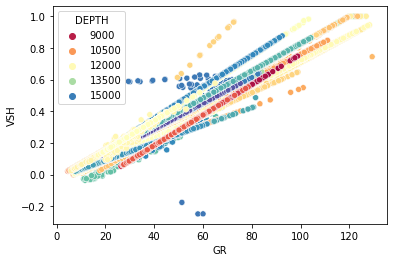

In [5]:
sns.scatterplot(df1_x_train.loc[:,'GR'], df1_y_train.loc[:,'VSH'],hue=df1_x_train.loc[:,'DEPTH'],palette='Spectral')
#plt.xlim((40,60))
#plt.ylim((0.2,0.5))

C:\Users\diego\anaconda3\envs\env1_cloned_tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GR', ylabel='DEPTH'>

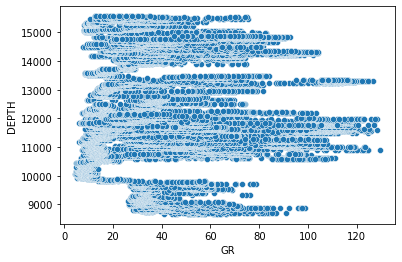

In [6]:
sns.scatterplot(df1_x_train.loc[:,'GR'],df1_x_train.loc[:,'DEPTH'],palette='Spectral')

C:\Users\diego\anaconda3\envs\env1_cloned_tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DEPTH', ylabel='VSH'>

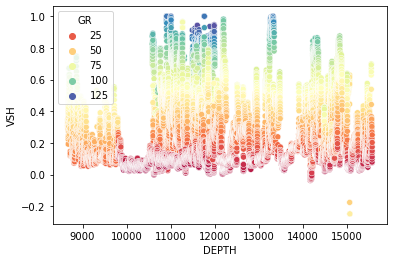

In [7]:
sns.scatterplot(df1_x_train.loc[:,'DEPTH'], df1_y_train.loc[:,'VSH'],hue=df1_x_train.loc[:,'GR'],palette='Spectral')

C:\Users\diego\anaconda3\envs\env1_cloned_tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 6.0)

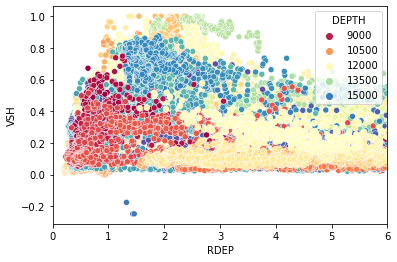

In [8]:
sns.scatterplot(df1_x_train.loc[:,'RDEP'], df1_y_train.loc[:,'VSH'],hue=df1_x_train.loc[:,'DEPTH'],palette='Spectral')
plt.xlim((0,6))
#plt.ylim((0.4,0.5))

### Scaling the data

In [9]:
scaler=StandardScaler()
df1_x_train=pd.DataFrame(scaler.fit_transform(df1_x_train),columns=df1_x_train.columns,index=df1_x_train.index)

In [10]:
df1_x_train.describe()

,DEPTH,DTC,DTS,CALI,DEN,DENC,GR,NEU,PEF,RDEP,RMED
count,3.892300e+04,3.892300e+04,3.892300e+04,3.892300e+04,3.892300e+04,3.892300e+04,3.892300e+04,3.892300e+04,3.892300e+04,3.892300e+04,3.892300e+04
mean,-5.607963e-16,-1.074859e-15,3.504977e-16,-1.123929e-14,5.257465e-16,1.869321e-16,1.401991e-16,-2.102986e-16,-4.264388e-16,7.009953e-17,-2.920814e-18
std,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00
min,-2.353674e+00,-3.080744e+00,-3.267988e+00,-2.867942e+00,-3.553419e+00,-7.895046e+00,-1.433010e+00,-2.474927e+00,-3.187129e+00,-4.619178e-01,-5.150258e-02
25%,-6.809933e-01,-6.169650e-01,-5.333123e-01,-6.321216e-01,-9.381885e-01,-5.067095e-01,-8.252737e-01,-5.761950e-01,-3.449403e-01,-4.130256e-01,-4.969439e-02
50%,-2.351319e-01,1.644001e-01,1.053119e-01,-2.863615e-02,6.743856e-02,6.197124e-02,-1.631829e-01,-4.623189e-02,1.458643e-01,-3.621667e-01,-4.738985e-02
75%,6.567949e-01,6.757331e-01,5.748703e-01,3.869801e-01,8.745939e-01,6.035719e-01,4.924944e-01,5.944952e-01,5.614761e-01,-1.405305e-01,-3.807755e-02
max,2.188472e+00,3.836809e+00,3.830474e+00,1.046811e+01,3.673139e+00,5.266620e+00,3.759153e+00,4.966009e+00,3.513791e+00,2.183668e+01,4.540729e+01


In [30]:
df1_x_train

,DEPTH,DTC,DTS,CALI,DEN,DENC,GR,NEU,PEF,RDEP,RMED
71,1.260705,-0.405395,1.385026,7.092669,1.653117,3.416779,0.628225,1.868162,1.093467,-0.390248,-0.049791
72,1.261034,0.671513,2.066085,6.248144,1.706139,3.330427,0.506768,1.182482,0.815545,-0.429592,-0.050282
78,1.263009,-0.410186,1.124673,6.248144,1.751402,3.078854,-0.015598,0.856835,0.756719,-0.401381,-0.049786
79,1.263338,-0.241716,0.592230,5.184734,0.551933,2.547917,-0.223472,0.765719,0.401865,-0.271973,-0.047059
80,1.263667,0.050814,-0.080431,1.856259,-0.289311,1.212919,-0.550798,0.074927,-0.003475,0.008213,-0.042400
...,...,...,...,...,...,...,...,...,...,...,...
42304,-0.065139,-1.635576,-1.618609,-0.691681,1.331233,-0.959221,-0.254050,-1.156683,0.026875,-0.322590,-0.047173
42305,-0.064810,-1.444106,-1.544390,-0.954503,1.339716,-1.026001,-0.426801,-1.326531,0.040978,-0.321188,-0.046810
42306,-0.064481,-1.300239,-1.433961,-0.945269,1.379464,-0.917419,-0.554205,-1.353693,0.106146,-0.301686,-0.046424
42307,-0.064151,-1.402072,-1.551256,-0.937879,1.398578,-0.927596,-0.669149,-1.498181,0.112631,-0.296349,-0.046265


### Split the dataset

In [31]:
# Here, we separate train and test data by wells
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(df1_x_train, df1_y_train, test_size=0.25, random_state=100)

# # if you want to separate train and test data randomly
# # please remember to use random_state for all randomization steps, this will ensure we get the same results 
# # as yours during the validation phase. 
# X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=100)

### Train the model

In [32]:
def grid_search(clf, param_grid, X_train=X_train, y_train=y_train,ht='random'):
    """
    Fits a classifier to its training data and prints its ROC AUC score.
    
    INPUT:
    - clf (classifier): classifier to fit
    - param_grid (dict): classifier parameters used with GridSearchCV
    - X_train (DataFrame): training input
    - y_train (DataFrame): training output
            
    OUTPUT:
    - classifier: input classifier fitted to the training data
    """
    # cv uses StratifiedKFold
    # scoring r2 as parameter
    if ht=='random':
        grid = RandomizedSearchCV(estimator=clf, 
                            param_distributions=param_grid, 
                            scoring='r2',n_iter=50,
                            cv=5)
    else:
        grid = GridSearchCV(estimator=clf, 
                            param_grid=param_grid, 
                            scoring='r2', 
                            cv=5)
    grid.fit(X_train, y_train)
    print(grid.best_score_)
    print(grid.best_estimator_)
    return grid.best_estimator_

In [33]:
def result_plot(y_predict, y_real, n_points=1000):
    names = ['PHIF', 'SW', 'VSH']
    RMSE, R2 = [], []
    
    for i,name in enumerate(names):
        RMSE.append(np.sqrt(mean_squared_error(y_real.iloc[:,i], y_predict.iloc[:,i])))
        R2.append(r2_score(y_real.iloc[:,i], y_predict.iloc[:,i]))
    
    # check the accuracy of predicted data and plot the result
    print('RMSE:', '{:.5f}'.format(np.sqrt(mean_squared_error(y_real, y_predict))))
    for i,name in enumerate(names):
        print(f'    {name:5s} : {RMSE[i]:.5f}')
#     print("-"*65)
    
    print( 'R^2: ', r2_score(y_real, y_predict))
    for i,name in enumerate(names):
        print(f'    {name:5s} : {R2[i]:.5f}')
    
    plt.subplots(nrows=3, ncols=2, figsize=(16,16))

    for i,name in enumerate(names):       
        plt.subplot(3, 2, i*2+1)
        plt.plot(y_real.iloc[:n_points, i])
        plt.plot(y_predict.iloc[:n_points, i])
        plt.legend(['True', 'Predicted'])
        plt.xlabel('Sample')
        plt.ylabel(name)
        plt.title(name+' Prediction Comparison')

        plt.subplot(3, 2, i*2+2)
        plt.scatter(y_real.iloc[:, i], y_predict.iloc[:, i], alpha=0.01)
        plt.xlabel('Real Value')
        plt.ylabel('Predicted Value')
        plt.title(name+' Prediction Comparison')
    
    plt.show()



In [34]:
y_pred_clusts=pd.DataFrame()
y_true_clusts=pd.DataFrame()

y_pred_clust=[1,2,3]
y_true_clust=[2,3,4]

pd.concat([y_pred_clusts,pd.Series(y_pred_clust)],axis=1)
#pd.concat([y_true_clusts,pd.Series(y_true_clust)],axis=1)

,0
0,1
1,2
2,3


In [35]:
from numpy.random import seed
seed(80)

tf.random.set_seed(79)
reg = GradientBoostingRegressor(random_state=100)
rf=RandomForestRegressor(n_estimators=100, random_state=100)
exreg = ExtraTreesRegressor(n_estimators=100, random_state=100)
adreg= AdaBoostRegressor(n_estimators=100, random_state=100)
lr=LinearRegression()
poly=PolynomialFeatures(degree=2,include_bias=False)
n_clust=1
if n_clust > 1:
    birch = Birch(threshold=0.01, n_clusters=n_clust)
    # fit the model
    birch.fit(X_train)
    # assign a cluster to each example
    yhat = birch.predict(X_train)
    # retrieve unique clusters
    clusters = unique(yhat)
    #for cluster in clusters:
    #    # get row indexes for samples with this cluster
    #    row_ix = where(yhat == cluster)
    names=['PHIF', 'SW']+[range(n_clust)]
    names
    #reg_best = grid_search(reg, {})
    yhat_val = birch.predict(X_val)

    clusts=[]
    clusts_val=[]

    for i in range(n_clust):
        clust=np.where(yhat==i)
        clusts.append(clust) # dataframes nested into a list

        clust_val=np.where(yhat_val==i)
        clusts_val.append(clust_val)
    #reg = GradientBoostingRegressor(n_estimators=100, random_state=100)
    clusters=[]
    cluster_instances=[]
    true=pd.DataFrame([])
    pred=pd.DataFrame([])

    clusters_val=[]
    cluster_instances_val=[]
    true_val=pd.DataFrame([])
    pred_val=pd.DataFrame([])

    for c,cval,i in zip(clusts,clusts_val,range(n_clust)):
        ind=c[0]
        target='SW'
        cluster_instance=y_train[target].iloc[ind]
        cluster_instances.append(cluster_instance)
        if i==0:
            reg_best_target = grid_search(exreg, {},X_train.iloc[ind],y_train[target].iloc[ind])
        else:  
            reg_best_target = grid_search(exreg, {},X_train.iloc[ind],y_train[target].iloc[ind])
        clust_results=reg_best_target.predict(X_train.iloc[ind])
        clusters.append(clust_results.tolist())
        pred=pd.concat([pred,pd.Series(clust_results)],axis=0)
        true=pd.concat([true,y_train[target].iloc[ind]],axis=0)
        #cross_validation
        ind_val=cval[0]
        if ind_val.size:
            cluster_instance_val=y_val[target].iloc[ind_val]
            cluster_instances_val.append(cluster_instance_val)
            clust_results_val=reg_best_target.predict(X_val.iloc[ind_val])
            clusters_val.append(clust_results_val.tolist())
            pred_val=pd.concat([pred_val,pd.Series(clust_results_val)],axis=0)
            true_val=pd.concat([true_val,y_val[target].iloc[ind_val]],axis=0)      
else:
 
    opt = keras.optimizers.Adam(learning_rate=0.000009, beta_1=0.92,beta_2=0.88,epsilon=1e-08,amsgrad='False')
    model=keras.models.Sequential([keras.layers.BatchNormalization(),
                                   #keras.layers.Dropout(rate=0.05),
                                   keras.layers.Dense(6820,activation='elu'
                                                      ,kernel_initializer='glorot_normal'
                                                     #,kernel_regularizer=keras.regularizers.l2(0.1)
                                                     ),
                                   keras.layers.BatchNormalization(),
                                   #keras.layers.Dropout(rate=0.07),
                                   keras.layers.Dense(1200,activation='elu',
                                                      kernel_initializer='glorot_normal',
                                                   #  ,kernel_regularizer=keras.regularizers.l2(0.02)
                                                    ),
                                   keras.layers.BatchNormalization(),
                                   #keras.layers.Dropout(rate=0.05),
                                   keras.layers.Dense(44,activation='elu'
                                                      ,kernel_initializer='glorot_normal'
                                                     #,kernel_regularizer=keras.regularizers.l2(0.1)
                                                     ),
                                   #keras.layers.BatchNormalization(),
                                   #keras.layers.Dropout(rate=0.21),
                                   keras.layers.Dense(1,activation='sigmoid')])
    #model.summary()
    model.compile(loss='mean_squared_error', optimizer=opt, metrics=[tf.keras.metrics.MeanSquaredError()])
    import os
    root_logdir=os.path.join(os.curdir,'my_logs')
    def get_run_logdir():
        import time
        run_id=time.strftime('run_%Y_%m_%d-%H_%M_%S')
        return os.path.join(root_logdir,run_id)
    run_logdir=get_run_logdir()
    tensorboard_cb=keras.callbacks.TensorBoard(run_logdir)
    #checkpoint_cb=keras.callbacks.ModelCheckpoint('my_keras_model',save_best_only=True)
    early_stopping_cb=keras.callbacks.EarlyStopping(patience=18,restore_best_weights=True)
    
    history=model.fit(np.array(X_train),np.array(y_train['VSH']),
    epochs=2000,validation_data=(X_val,y_val['VSH']),
                     callbacks=[early_stopping_cb])


Epoch 1/2000
913/913 [==============================] - 6s 6ms/step - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 2/2000
913/913 [==============================] - 5s 6ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 3/2000
913/913 [==============================] - 5s 6ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 4/2000
913/913 [==============================] - 6s 6ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 5/2000
913/913 [==============================] - 6s 6ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 6/2000
913/913 [==============================] - 5s 6ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 9.7994e-04 - val_mean_squared_error: 9.7994e-04
Epoch 7/

Epoch 49/2000
913/913 [==============================] - 5s 6ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 9.4938e-04 - val_mean_squared_error: 9.4938e-04
Epoch 50/2000
913/913 [==============================] - 5s 6ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 6.7566e-04 - val_mean_squared_error: 6.7566e-04
Epoch 51/2000
913/913 [==============================] - 5s 6ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 6.4258e-04 - val_mean_squared_error: 6.4258e-04
Epoch 52/2000
913/913 [==============================] - 5s 6ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 6.0347e-04 - val_mean_squared_error: 6.0347e-04
Epoch 53/2000
913/913 [==============================] - 5s 6ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 6.1757e-04 - val_mean_squared_error: 6.1757e-04
Epoch 54/2000
913/913 [==============================] - 6s 6ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 7.0913e-04

In [36]:
param_grid={"max_depth" : [280],
            #"min_samples_leaf":[4],
            #'learning_rate': [0.12],
            "min_samples_leaf":[5],
            #'tol': [0.0001],
            #'min_impurity_decrease':[0.3],
            #"min_weight_fraction_leaf":[0.0],
            "max_features":['auto'],
            "max_leaf_nodes":[8] ,
            'n_iter_no_change':[3],
            #'min_impurity_decrease':[0.3],
            #'warm_start':['True'],
            #'criterion':['squared_error'],
               'n_estimators': [80]}  


reg_best_SW = grid_search(reg,param_grid,X_train, y_train.loc[:,'SW'],ht='nonrandom')
a=reg_best_SW.predict(X_val)
mean_squared_error(y_val.loc[:,'SW'], a)

0.9829289024475918
GradientBoostingRegressor(max_depth=280, max_features='auto', max_leaf_nodes=8,
                          min_samples_leaf=5, n_estimators=80,
                          n_iter_no_change=3, random_state=100)


0.002318985568646592

In [37]:
#max_depth=10, min_samples_leaf=2, n_estimators=80
param_grid={#"max_depth" : [100],
              'bootstrap': [False],
            "min_samples_leaf":[6],
           "min_weight_fraction_leaf":[0.0],
            "max_features":["auto"],
            "max_leaf_nodes":[6000] ,
               'n_estimators': [80]
          #'bootstrap': [True, False]
           }   
reg_best_PHIF = grid_search(exreg,param_grid,X_train, y_train.loc[:,'PHIF'],ht='nonrandom')
a=reg_best_PHIF.predict(X_val)
mean_squared_error(y_val.loc[:,'PHIF'], a)

0.9925557942812882
ExtraTreesRegressor(max_leaf_nodes=6000, min_samples_leaf=6, n_estimators=80,
                    random_state=100)


5.468534781204278e-05

In [38]:
reg_best_PHIF.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': 6000,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 80,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 100,
 'verbose': 0,
 'warm_start': False}

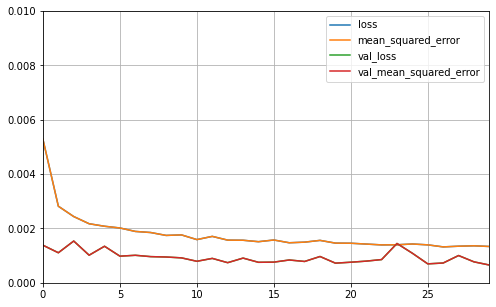

In [39]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_xlim(0,29)
plt.gca().set_ylim(0,0.01)
model.save('my_keras_model_iterativeimp_113.h5')

In [40]:
model=keras.models.load_model('my_keras_model_iterativeimp_113.h5') 
model.summary()

#to visualize activation functions
for i, layer in enumerate (model.layers):
    print (i, layer)
    try:
        print ("    ",layer.activation)
    except AttributeError:
        print('   no activation attribute')
#specific info about each layer
for i in range(len(model.layers)):
    print(f'{i}   {model.layers[i]}: \n{model.layers[i].get_config()} \n')
#info about optimizers
model.optimizer.get_config()        

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_9 (Batch (None, 11)                44        
_________________________________________________________________
dense_12 (Dense)             (None, 6820)              81840     
_________________________________________________________________
batch_normalization_10 (Batc (None, 6820)              27280     
_________________________________________________________________
dense_13 (Dense)             (None, 1200)              8185200   
_________________________________________________________________
batch_normalization_11 (Batc (None, 1200)              4800      
_________________________________________________________________
dense_14 (Dense)             (None, 44)                52844     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                

{'name': 'Adam',
 'learning_rate': 9e-06,
 'decay': 0.0,
 'beta_1': 0.92,
 'beta_2': 0.88,
 'epsilon': 1e-08,
 'amsgrad': 'False'}

### Predict on validation dataset

RMSE: 0.02886
    PHIF  : 0.00531
    SW    : 0.04414
    VSH   : 0.02288
R^2:  0.9889865167767243
    PHIF  : 0.99560
    SW    : 0.98460
    VSH   : 0.98676


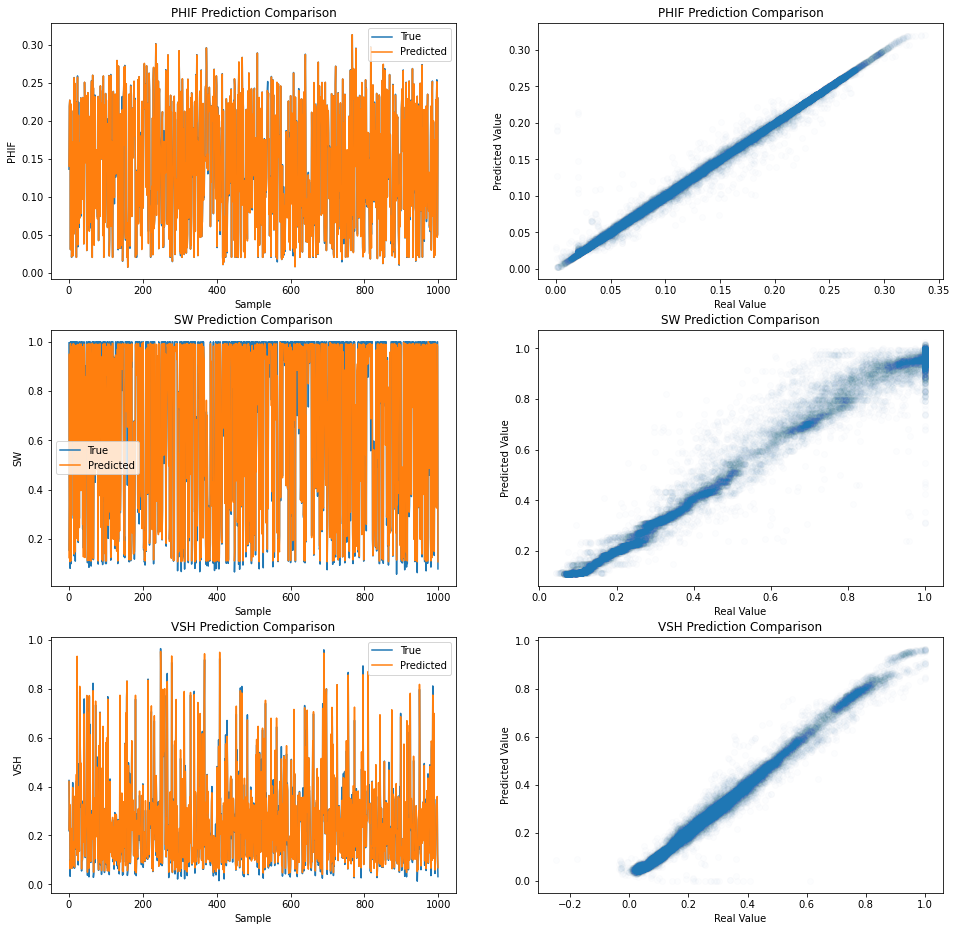

RMSE: 0.03111
    PHIF  : 0.00739
    SW    : 0.04816
    VSH   : 0.02303
R^2:  0.9866774745744925
    PHIF  : 0.99140
    SW    : 0.98182
    VSH   : 0.98681


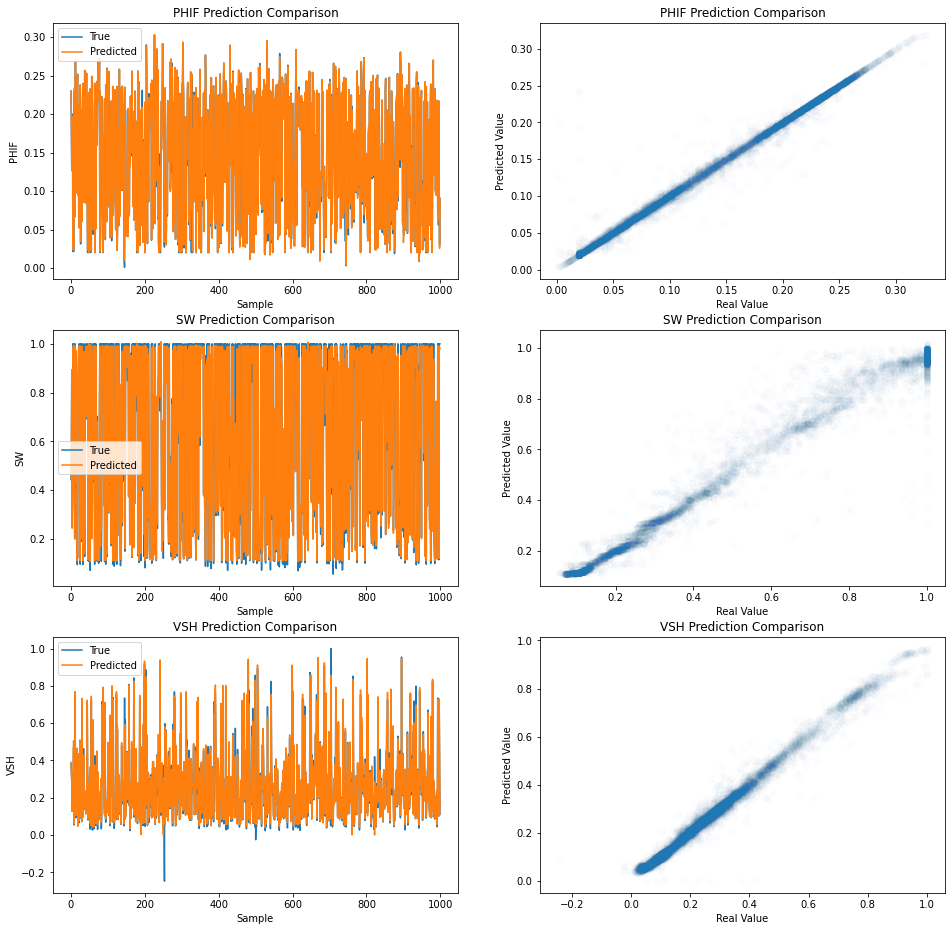

true:              0         1         2
0      0.136200  0.996000  0.424700
1      0.219000  0.153000  0.217000
2      0.227100  0.343900  0.315300
3      0.223400  0.081700  0.033400
4      0.030137  1.000000  0.100600
...         ...       ...       ...
29187  0.132200  0.576900  0.999800
29188  0.220956  0.154362  0.201976
29189  0.231900  0.107300  0.022400
29190  0.259000  0.288300  0.292300
29191  0.046751  1.000000  0.206900

[29192 rows x 3 columns]
pred:              0         1             2
0      0.140115  0.948759   [0.4207037]
1      0.219342  0.122771  [0.22179565]
2      0.227174  0.348477  [0.32737443]
3      0.223951  0.108556  [0.06365534]
4      0.030256  0.992425  [0.09742861]
...         ...       ...           ...
29187  0.132765  0.593127   [0.9566538]
29188  0.226237  0.173562   [0.1795949]
29189  0.232218  0.116025  [0.05292736]
29190   0.25859  0.309667  [0.28721353]
29191  0.046673   0.99109  [0.21199414]

[29192 rows x 3 columns]
true:           0       1 

In [41]:
if n_clust >1:
    y_predict=pd.DataFrame([reg_best_PHIF.predict(X_train),pred.values.flatten(),
                            model.predict(X_train)]).T#clusters
                  #reg_best_VSH.predict(X_train)
    y_true=pd.DataFrame([y_train['PHIF'].values.tolist(),true.values.flatten(),y_train['VSH'].values.tolist()]).T#+ cluster_instances
    
    y_predict_val=pd.DataFrame([reg_best_PHIF.predict(X_val),pred_val.values.flatten()
                               ,model.predict(X_val)]).T#clusters
              #reg_best_VSH.predict(X_train)
    y_true_val=pd.DataFrame([y_val['PHIF'].values.tolist(),true_val.values.flatten(),y_val['VSH'].values.tolist()]).T
else:
    y_predict=pd.DataFrame([reg_best_PHIF.predict(X_train),
                            reg_best_SW.predict(X_train),model.predict(X_train)]).T#clusters
                  #reg_best_VSH.predict(X_train)
    y_true=pd.DataFrame([y_train['PHIF'].values.tolist(),y_train['SW'].values.tolist(),y_train['VSH'].values.tolist()]).T#+ cluster_instances
    
    y_predict_val=pd.DataFrame([reg_best_PHIF.predict(X_val),
                        reg_best_SW.predict(X_val),model.predict(X_val)]).T#clusters
              #reg_best_VSH.predict(X_train)
    y_true_val=pd.DataFrame([y_val['PHIF'].values.tolist(),y_val['SW'].values.tolist(),y_val['VSH'].values.tolist()]).T
    
    
result_plot(y_predict, y_true)#,names=['PHIF', 'SW',list(range(n_clust))])
result_plot(y_predict_val, y_true_val)

print(f'true:{y_true}')
print(f'pred:{y_predict}')

print(f'true:{y_true_val}')
print(f'pred:{y_predict_val}')

### Predict the test dataset

In [56]:
# load test data
df2 = pd.read_csv('test.csv')

# Replace missing value -9999 with np.nan
df2.replace(['-9999', -9999], np.nan, inplace=True)

df2.describe()

,WELLNUM,DEPTH,DTC,DTS,BS,CALI,DEN,DENC,GR,NEU,PEF,RDEP,RMED,ROP
count,11275.00,11275.00,10614.00,3911.00,11275.00,11275.00,11193.00,11193.00,11275.00,11271.00,11193.00,11198.00,11198.00,6394.00
mean,102.01,12643.58,81.92,146.65,8.53,8.53,2.41,0.03,65.90,0.21,4.14,32.27,35.85,44.89
std,1.64,2516.27,11.36,15.44,0.31,0.19,0.15,0.03,56.26,0.08,1.43,265.81,301.75,56.58
min,100.00,10177.50,48.28,98.21,8.50,8.25,1.33,-0.10,3.99,0.04,1.55,0.10,0.10,3.02
25%,100.00,10869.50,74.20,138.00,8.50,8.36,2.27,0.00,30.11,0.16,3.08,1.74,1.70,24.82
50%,101.00,11343.00,82.69,145.53,8.50,8.51,2.45,0.02,53.77,0.20,3.90,2.86,2.76,25.05
75%,104.00,16034.25,88.91,158.38,8.50,8.65,2.54,0.04,94.25,0.24,5.02,8.18,7.88,44.09
max,104.00,17443.50,125.39,190.26,12.25,9.31,3.20,0.19,1711.42,0.73,15.14,5000.00,5000.00,300.11


In [57]:
test_data = np.array(df2.loc[:,['DEPTH', 'DTC', 'DTS', 'CALI', 'DEN', 'DENC', 'GR', 'NEU', 'PEF',
        'RDEP', 'RMED']])

# Imputation transformer for completing missing values.
imp_mean = IterativeImputer(estimator=BayesianRidge()) #ExtraTreesRegressor(n_estimators=25, random_state=100))
test_data = imp_mean.fit_transform(test_data)

# standardize testing data
X_test = scaler.transform(test_data)

In [58]:
test_predict = np.array([reg_best_PHIF.predict(X_test), #reg_best_SW
                        reg_best_SW.predict(X_test),model.predict(X_test).flatten()]).T
test_predict

array([[0.07023856, 0.93493961, 0.10927279],
       [0.08314334, 0.93493961, 0.11255418],
       [0.09220281, 0.92613922, 0.09868915],
       ...,
       [0.14513679, 0.97725317, 0.1996505 ],
       [0.15053144, 0.95782502, 0.18169178],
       [0.16005232, 0.93486668, 0.1830651 ]])

In [59]:
# Replace team_name and num_submit
team_name = 'Iron486'
num_submit = 2

# Please don't change codes below
N_SAMPLES = 11275
n_sub_dict = {1:1, 2:2, 3:3}

# Check submission number is correct
try:
    n_sub = n_sub_dict[num_submit]
except KeyError:
    print(f"ERROR!!! Submission Number must be in 1, 2 or 3")

# Check number of samples are correct
if test_predict.shape[0] != N_SAMPLES:
    raise ValueError(f"Number of samples {test_predict.shape[0]} doesn't matches with the correct value {N_SAMPLES}")

# Write results to csv file
output_result = pd.DataFrame({col_names[-3]:test_predict[:,0], col_names[-2]:test_predict[:,1], col_names[-1]:test_predict[:,2]})
output_result.to_csv(path_or_buf=f'./{team_name}_{n_sub}.csv', index=False)